In [1]:
import numpy as np
import sys,math
sys.path.append('/home/lukas/projects/millifluidics/programs/extractdropletdata/')
import millidrop_dataclass as mdc
import os,glob
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd


from scipy.optimize import curve_fit

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12,8]
matplotlib.rc('font',family='Monospace')

In [5]:
dropdir = '/home/lukas/projects/millifluidics/experimentaldata/qbio/170811/'
dropfiles = glob.glob(dropdir + 'droplets/*.csv')
templatefile = dropdir + 'template.csv'

# fluo_1_mean: PVD
# fluo_2_mean: mCherry
# fluo_3_mean: GFP
# fluo_4_mean: YFP

kwargs = {'infiles':dropfiles,
          'templatefile':templatefile,
          'datacolumns':['time','fluo_2_mean','fluo_3_mean','fluo_1_mean']}

data = mdc.DropletData(**kwargs)
#data.set_restriction('max','all',['time',130000])

excludelabels = ['Separator']



In [10]:
def MLSQ_fit(x,y):
    a = (len(x) * np.sum(x * y) - np.sum(x)*np.sum(y))/(len(x) * np.sum(x*x) - np.sum(x)*np.sum(x))
    b = (np.sum(y) - a * np.sum(x))/np.sum(x)
    return a,b

def compute_R2(val,pred):
    return 1 - np.sum((val-pred)**2)/np.sum((val - np.mean(val))**2)

def linfit(x,coeff):
    return coeff[0]*x + coeff[1]

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide


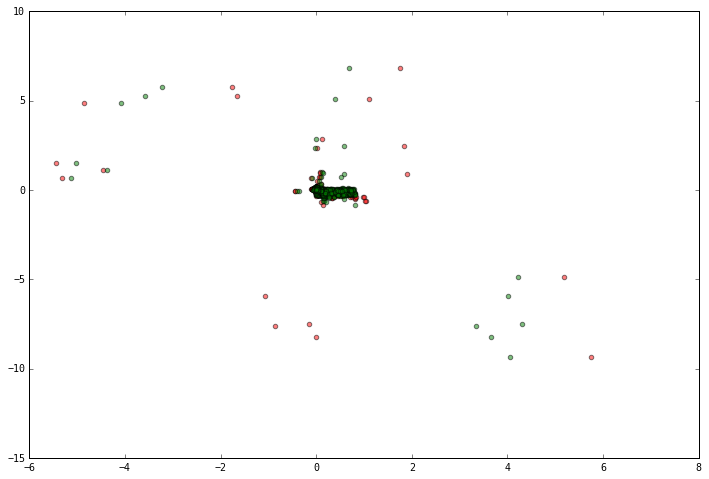

5-5                         nan                  nan        nan                  nan


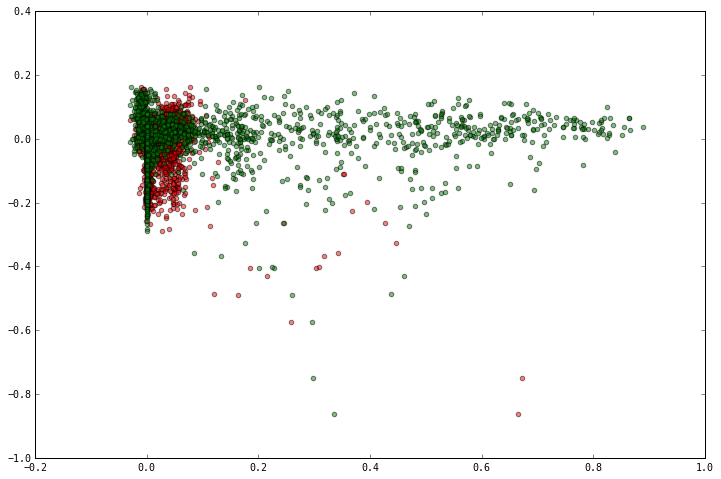

0-5                       -0.73              -22.058       0.05               -1.248


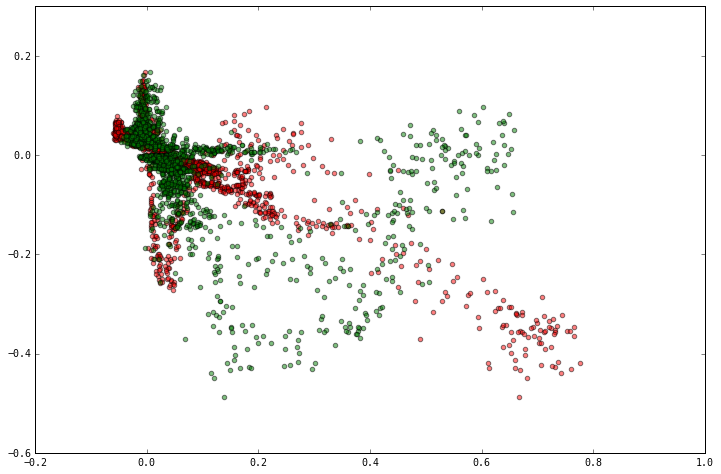

100-5                     -0.51               -2.906      -0.30                0.142


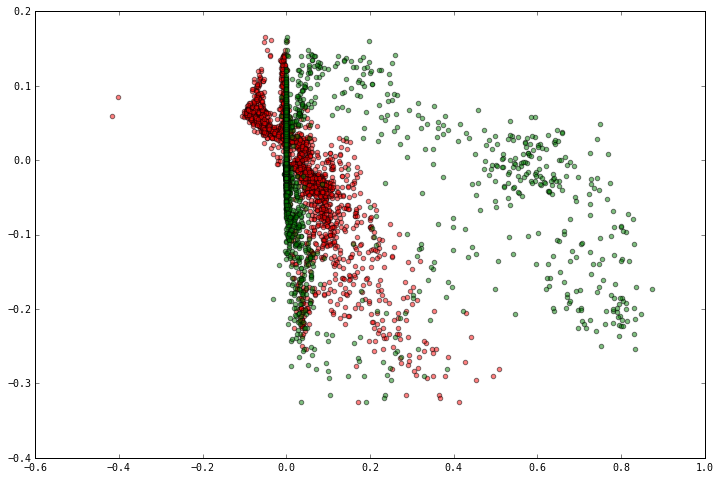

25-100                    -0.79              -14.012      -0.12               -0.261


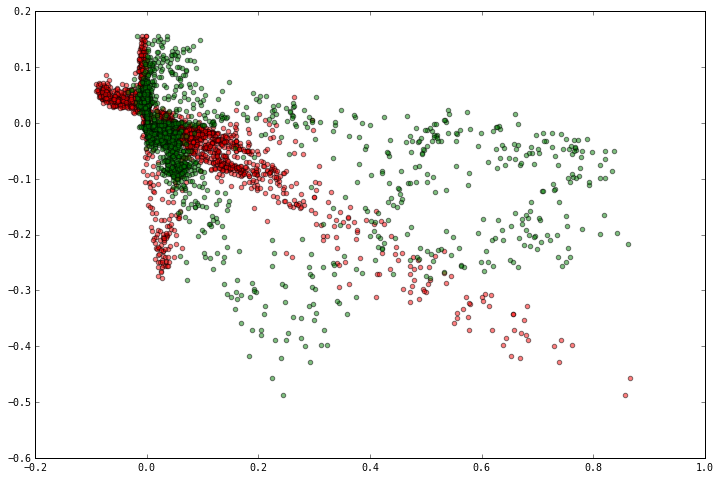

25-25                     -0.56               -2.944      -0.22                0.213


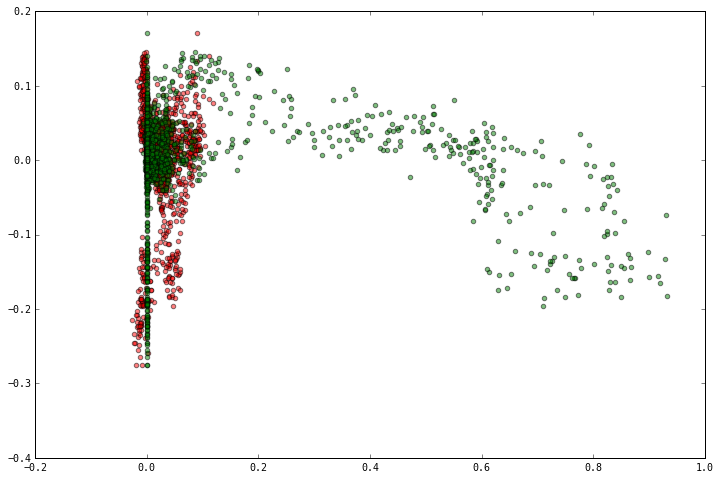

0-100                      0.34              -32.339      -0.06               -0.219


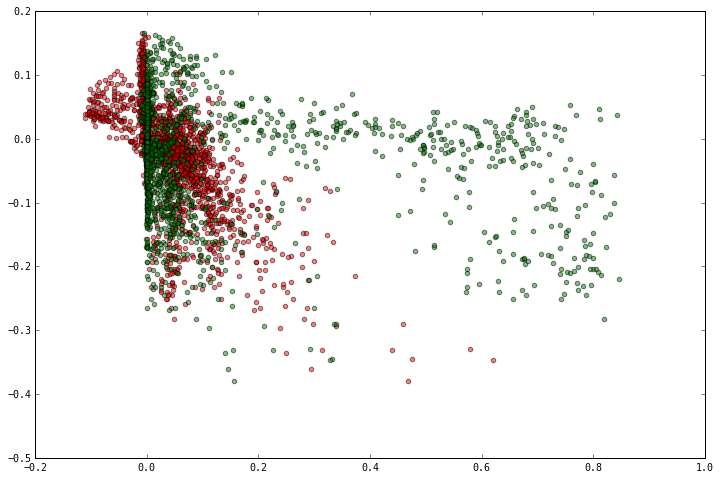

5-25                      -0.78               -6.325      -0.09               -2.509


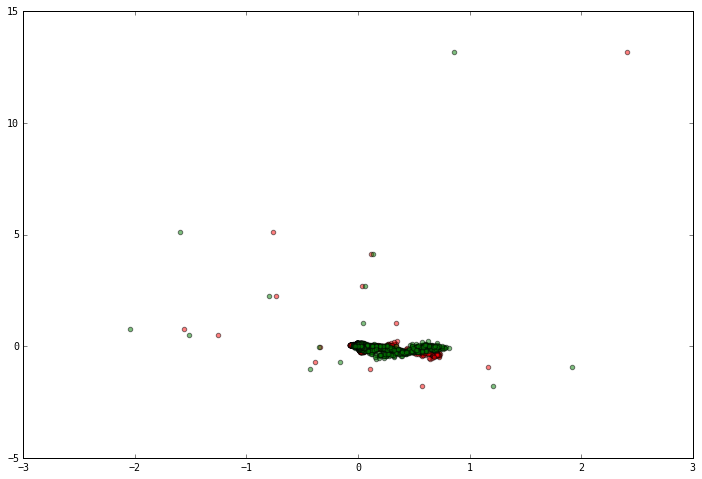

100-25                    -0.01               -0.128      -0.26               -0.097


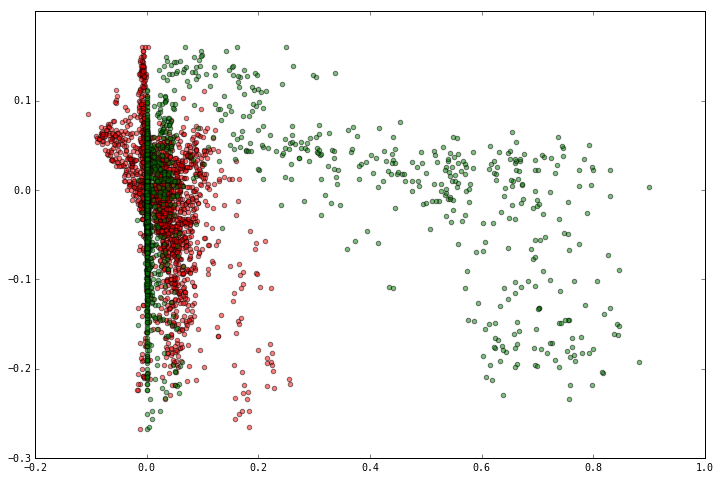

5-100                     -0.73              -12.339      -0.04               -1.212


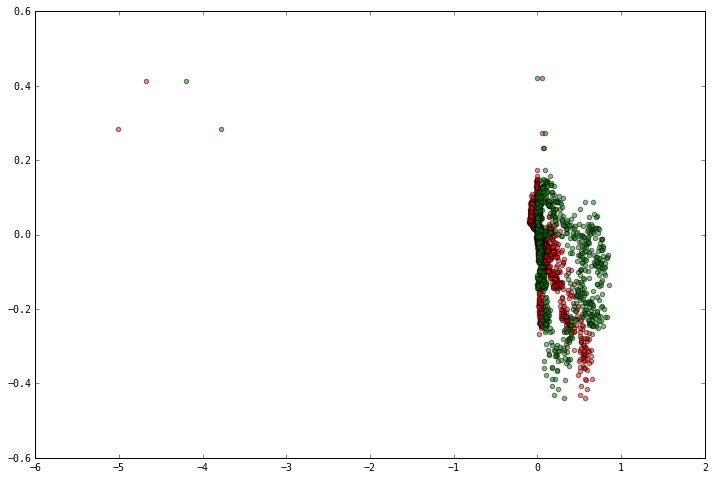

100-100                   -0.28               -0.714      -0.17                0.073


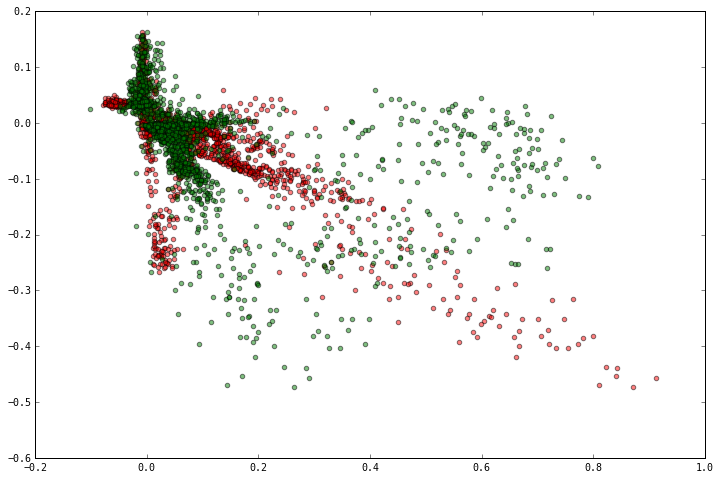

25-5                      -0.52               -1.763      -0.24               -0.400


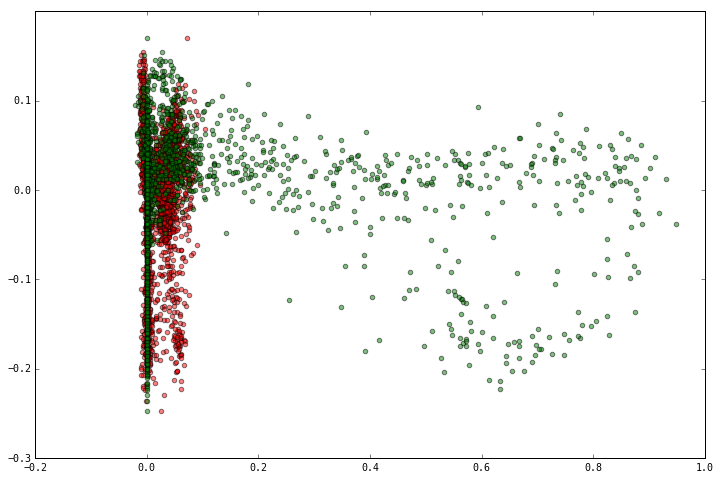

0-25                       0.10              -34.555      -0.03               -0.407


In [21]:
n=2
for label,trajectories in data:
    if label not in excludelabels:
        grP = np.array([])
        grNP = np.array([])
        pvdProd = np.array([])
        for t in trajectories:
            t[:,0] /= 3.6e3
            grP     = np.concatenate([grP ,np.diff(np.log(t[:,1]))/np.diff(t[:,0])])
            grNP    = np.concatenate([grNP,np.diff(np.log(t[:,2]))/np.diff(t[:,0])])
            pvdProd = np.concatenate([pvdProd,np.diff(t[:,1]/t[:,3])/np.diff(t[:,0])])
        
        
        plt.scatter(grP,pvdProd,c='r',alpha=.5)
        plt.scatter(grNP,pvdProd,c='g',alpha=.5)
        
        linregP  = MLSQ_fit(grP ,pvdProd)
        linregNP = MLSQ_fit(grNP,pvdProd)
        
        r2P  = compute_R2(pvdProd,linfit(grP,linregP))
        r2NP = compute_R2(pvdProd,linfit(grNP,linregNP))
        plt.show()
        print '{:20s} {:10.2f} {:20.3f} {:10.2f} {:20.3f}'.format(label,linregP[0],r2P,linregNP[0],r2NP)
            